In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive


Exercise 1. Explore the readme

In your notebook, open and print the contents of readme.md.
Question: According to the readme, which column in the dataset corresponds to the TB death rate?


In [ ]:
fn = "/content/drive/MyDrive/route_TB_Data_explorer_5.7_Jinich/data/readme.md"
with open(fn, "r") as fh:
    text = fh.read()
print(text)

# Tuberculosis deaths - Data package

This data package contains the data that powers the chart ["Tuberculosis deaths"](https://ourworldindata.org/grapher/tuberculosis-deaths-who?v=1&csvType=full&useColumnShortNames=false) on the Our World in Data website. It was downloaded on September 23, 2025.

### Active Filters

A filtered subset of the full data was downloaded. The following filters were applied:

## CSV Structure

The high level structure of the CSV file is that each row is an observation for an entity (usually a country or region) and a timepoint (usually a year).

The first two columns in the CSV file are "Entity" and "Code". "Entity" is the name of the entity (e.g. "United States"). "Code" is the OWID internal entity code that we use if the entity is a country or region. For normal countries, this is the same as the [iso alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) code of the entity (e.g. "USA") - for non-standard countries like historical countries these are c

In [ ]:
import os

# List contents of the mounted Google Drive's root folder
print(os.listdir('/content/drive/MyDrive'))

['route_TB_Data_explorer_5.7_Jinich', 'Copy of Academic Planning Worksheet (1).gsheet', 'mmw11 midterm', 'D5 FIELD GUIDE.pptx', 'mmw11 study guide.gdoc', 'MATH 20B MIDTERM CHEAT SHEET.gdoc', 'Copy of Academic Planning Worksheet.gsheet', 'D10.docx', '01-COGS2-Discussion-Hoarding (1).gdoc', 'Copy of Cogs 17: Homeworks.gdoc', '01-COGS2-Discussion-Hoarding.gdoc', 'Copy of 01-COGS2-Discussion-Hoarding.gdoc', 'cogs 2 discussion 5.gdoc', 'Copy of cogs 2 discussion 5 Srikar Mannam.gdoc', 'Srikar Mannam CA 1.gdoc', 'Srikar Mannam_CA1 (1).gdoc', 'COGS 2 - Cognitive Neuroeconomics disc 2 12.gdoc', 'MMW 12 Notes.gdoc', 'mm2 12 ta essay draft Srikar Mannam.gdoc', 'Srikar Mannam MMW 12 Thematic Analyis Draft.gdoc', 'final p2.gdoc', 'MMW 12 TA ESSAY Srikar Mannam.gdoc', 'AI MMW.gdoc', 'MMW AI.gdoc', 'SRIKAR MANNAM_A2.gdoc', 'Srikar Mannam CA2.gdoc', 'CA2 AI.gdoc', 'Srikar Mannam MMW GenAI Policy (updated 11 20 23) (4).gdoc', 'Outline Lecture One—Introduction Lecture to Course Themes.gdoc', 'mmw (1)',

Exercise 2. Load the dataset

- Using pandas, load tuberculosis-deaths-who.csv into a DataFrame.
- Display the first 5 rows with .head().


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/route_TB_Data_explorer_5.7_Jinich/data/tuberculosis-deaths-who.csv")
df.head()

,Entity,Code,Year,Estimated number of deaths from all forms of tuberculosis
0,Afghanistan,AFG,2000,14000
1,Afghanistan,AFG,2001,13000
2,Afghanistan,AFG,2002,12000
3,Afghanistan,AFG,2003,13000
4,Afghanistan,AFG,2004,12000


Exercise 3. Inspect the DataFrame
- Print out the column names.
Use .info() to see data types and missing values.
Use .describe() to summarize numeric columns.
Question: How many unique countries are in the dataset?

In [ ]:
print("Column Names:", df.columns.tolist())
print("\nDataFrame Info:")
df.info()
print("\nDataFrame Description:")
df.describe()

unique_countries = df['Entity'].nunique()
print(f"\nNumber of unique countries in the dataset: {unique_countries}")

Column Names: ['Entity', 'Code', 'Year', 'Estimated number of deaths from all forms of tuberculosis']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Entity                                                     5357 non-null   object
 1   Code                                                       5117 non-null   object
 2   Year                                                       5357 non-null   int64 
 3   Estimated number of deaths from all forms of tuberculosis  5357 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 167.5+ KB

DataFrame Description:

Number of unique countries in the dataset: 225


Exercise 4. Visualize trends
Choose one country and plot TB death rates over time.
Bonus: plot two or three countries on the same chart to compare trends.


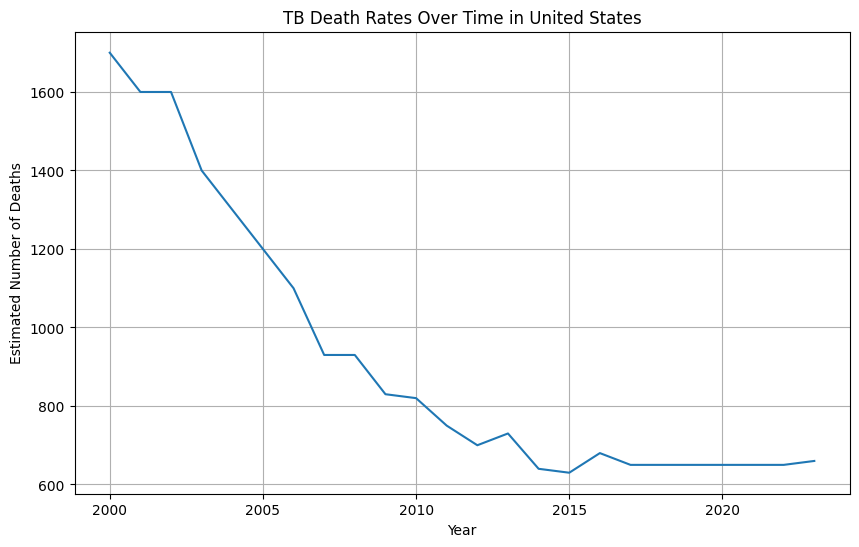

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

country1 = 'United States'
df_country1 = df[df['Entity'] == country1]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Estimated number of deaths from all forms of tuberculosis', data=df_country1)
plt.title(f'TB Death Rates Over Time in {country1}')
plt.xlabel('Year')
plt.ylabel('Estimated Number of Deaths')
plt.grid(True)
plt.show()

### Bonus: Plotting multiple countries for comparison

Now, let's plot TB death rates for 'United States', 'India', and 'China' to compare their trends.

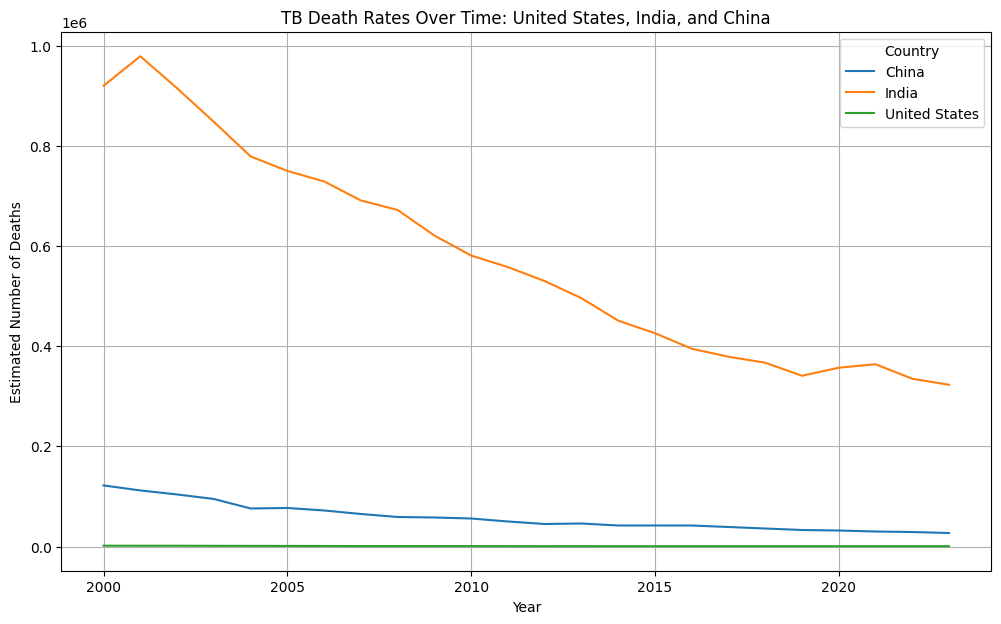

In [ ]:
countries_to_compare = ['United States', 'India', 'China']
df_compare = df[df['Entity'].isin(countries_to_compare)]

plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Estimated number of deaths from all forms of tuberculosis', hue='Entity', data=df_compare)
plt.title('TB Death Rates Over Time: United States, India, and China')
plt.xlabel('Year')
plt.ylabel('Estimated Number of Deaths')
plt.legend(title='Country')
plt.grid(True)
plt.show()

Exercise 5. Ask & answer a question
Formulate one simple, reproducible question using this dataset (e.g., “Which region had the highest TB death rate in 1990?”).
Answer it with a short code snippet and a brief reflection.


In [ ]:
latest_year = df['Year'].max()

df_latest_year = df[df['Year'] == latest_year]

country_highest_deaths = df_latest_year.loc[df_latest_year['Estimated number of deaths from all forms of tuberculosis'].idxmax()]

print(f"In {latest_year}, the country with the highest estimated number of TB deaths was {country_highest_deaths['Entity']} with {country_highest_deaths['Estimated number of deaths from all forms of tuberculosis']} deaths.")

In 2023, the country with the highest estimated number of TB deaths was World with 1218861 deaths.


This analysis helps identify the regions most impacted by TB mortality in recent times, which can be crucial for targeted public health programs. The result clearly shows which country had the highest burden in the latest recorded year within this dataset.